### We study the SIR infection spreading dynamics system with 3 species (effective dynamics only for S and I) as defined by:

$$
\begin{split}
S + I &\rightarrow^{k_i} 2I \hspace{20pt} \text{Susceptible and Infectious make two infectious}\\
I &\rightarrow^{k_{2I}} \emptyset \hspace{20pt} \text{Infectious people recover or die} \\
R &= S_0 +I_0 - (S+I) \hspace{20pt} \text{Recovered or Dead people} \\
\end{split}
$$

In [1]:
push!(LOAD_PATH, "../src/Achedmy/")
using Achedmy
using Pkg
using PyPlot
using Catalyst
using LinearAlgebra
using DifferentialEquations
using Serialization
# using LaTeXStrings

In [2]:
SIR_system = @reaction_network begin
    @species S(t) = 5. I(t) = 1.
    @parameters k_i = 0.75 k_2I = 1.
   (k_i), S + I --> I+I
   (k_2I), I --> 0
end

Model ##ReactionSystem#235
States (2):
  S(t) [defaults to 5.0]
  I(t) [defaults to 1.0]
Parameters (2):
  k_i [defaults to 0.75]
  k_2I [defaults to 1.0]

In [3]:
Graph(SIR_system)

Graph("G", true, "dot", Catalyst.Statement[Catalyst.Node("S", OrderedCollections.OrderedDict{Symbol, Union{Catalyst.Html, String}}(:shape => "circle", :color => "#6C9AC3")), Catalyst.Node("I", OrderedCollections.OrderedDict{Symbol, Union{Catalyst.Html, String}}(:shape => "circle", :color => "#6C9AC3")), Catalyst.Node("rx_1", OrderedCollections.OrderedDict{Symbol, Union{Catalyst.Html, String}}(:shape => "point", :color => "#E28F41", :width => ".1")), Catalyst.Node("rx_2", OrderedCollections.OrderedDict{Symbol, Union{Catalyst.Html, String}}(:shape => "point", :color => "#E28F41", :width => ".1")), Catalyst.Edge(Catalyst.NodeID[Catalyst.NodeID("S", "", ""), Catalyst.NodeID("rx_1", "", "")], OrderedCollections.OrderedDict{Symbol, Union{Catalyst.Html, String}}(:label => "1", :labelfontsize => "6")), Catalyst.Edge(Catalyst.NodeID[Catalyst.NodeID("I", "", ""), Catalyst.NodeID("rx_1", "", "")], OrderedCollections.OrderedDict{Symbol, Union{Catalyst.Html, String}}(:label => "1", :labelfontsize =

### Insert some Gillespie time traces with code here!

In [4]:
#Parameters simulation
tstart= 0.
tmax = 10.

atol = 1e-3 #decrease this value to increase the accuracy of the simulation (components smaller than this get rejected!)
rtol = 1e-2

dtmax = 0.05 #maximum time step allowed


0.05

In [5]:
alpha_range = [1.]

1-element Vector{Float64}:
 1.0

In [8]:
@unpack k_i = SIR_system

SOL = []
VAR = []
STR = []

for i in alpha_range

    SIR_system.defaults[k_i] *= i

    structure = Achedmy.ReactionStructure(SIR_system)
    variables = Achedmy.ReactionVariables(structure,"cross")
    sol = Achedmy.solve_dynamics!(structure,variables,selfEnergy = "gSBR", tmax = tmax, tstart = tstart,
                     atol = atol, rtol = rtol, dtmax = dtmax)
    push!(SOL,sol)
    push!(VAR,variables)
    push!(STR,structure)

end

t: 0.0
t: 1.0e-6
t: 5.999999999999999e-6
t: 1.8030695579187065e-5
t: 3.389970799708853e-5
t: 8.790723325642077e-5
t: 0.00022300527346550976
t: 0.0005176375567735956
t: 0.0009807816248634954
t: 0.0018780616035736315
t: 0.003173043141177774
t: 0.005238428152990023
t: 0.00798219792325571
t: 0.011845481720401204
t: 0.016699004045339454
t: 0.02296314059498136
t: 0.030535906451657817
t: 0.03973448946919031
t: 0.05055835275335395
t: 0.06315525873102981
t: 0.07769035358842019
t: 0.09409186024452439
t: 0.11273894332204593
t: 0.13330076848686656
t: 0.15640541563257102
t: 0.18142927021707178
t: 0.20927632485595066
t: 0.2390004168074246
t: 0.2718068014682478
t: 0.3064018279591517
t: 0.34432052577453065
t: 0.3839030005696674
t: 0.42704690338797124
t: 0.4717124600954363
t: 0.517976126815058
t: 0.5663516905825356
t: 0.6163516905825357
t: 0.6663516905825357
t: 0.7163516905825358
t: 0.7663516905825358
t: 0.8163516905825359
t: 0.8663516905825359
t: 0.916351690582536
t: 0.966351690582536
t: 1.01635169058

### Plotting the means and the variances:

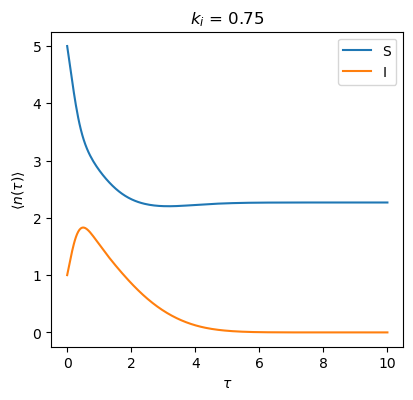

In [21]:
plot_indices = [1]

figure(figsize=(10,9))
for i in range(1,length(plot_indices))
    subplot(2,2,i)
    for j in range(1,length(species(SIR_system)))
        plot(SOL[plot_indices[i]].t,VAR[plot_indices[i]].μ[j,:],label=alpha_range[plot_indices[i]])
        legend(["S","I"])
    end
    xlabel(L"$\tau$")
    ylabel(L"$\langle n(\tau)\rangle$")
    title(L"$k_i$ = " * string(SIR_system.defaults[k_i]))
end

gcf()


In [22]:
savefig("../plots/SIR/SIR_means.png")
close("all")

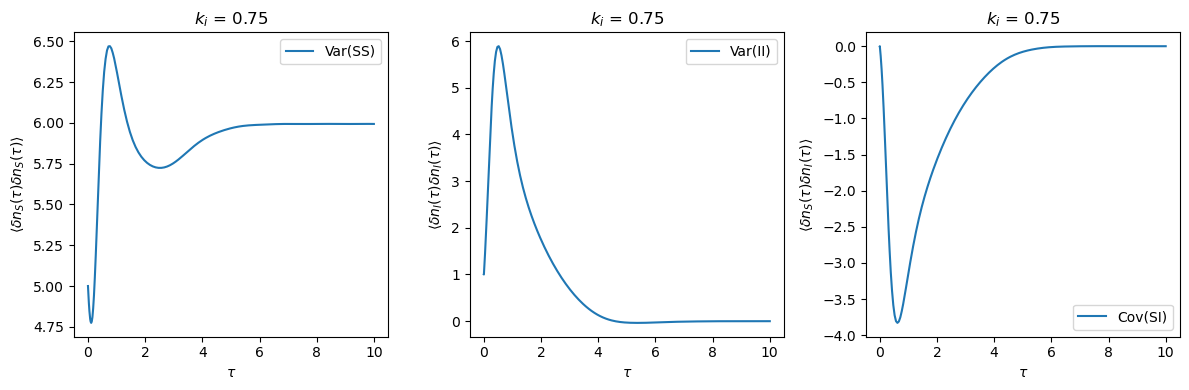

In [49]:
plot_indices = 1

figure(figsize=(12,4))
subplot(1,3,1)
plot(SOL[plot_indices].t,diag(VAR[plot_indices].N[1,1,:,:]))
legend(["Var(SS)"])

xlabel(L"$\tau$")
ylabel(L"$\langle \delta n_S(\tau) \delta n_S(\tau) \rangle$")
title(L"$k_i$ = " * string(SIR_system.defaults[k_i]))

subplot(1,3,2)
plot(SOL[plot_indices].t,diag(VAR[plot_indices].N[2,2,:,:]))
legend(["Var(II)"])
xlabel(L"$\tau$")
ylabel(L"$\langle \delta n_I(\tau) \delta n_I(\tau) \rangle$")
title(L"$k_i$ = " * string(SIR_system.defaults[k_i]))

subplot(1,3,3)
plot(SOL[plot_indices].t,diag(VAR[plot_indices].N[1,2,:,:]))
legend(["Cov(SI)"])
xlabel(L"$\tau$")
ylabel(L"$\langle \delta n_S(\tau) \delta n_I(\tau) \rangle$")
title(L"$k_i$ = " * string(SIR_system.defaults[k_i]))

tight_layout()
gcf()



In [50]:
savefig("../plots/SIR/SIR_variances.png")
close("all")

### Saving and reading data:

In [6]:
# ## Reading data

# SOL = open("../data/SIR/sol_gSBR.jls", "r") do f
#     deserialize(f)
# end

# VAR = open("../data/SIR/var_gSBR.jls", "r") do f
#     deserialize(f)
# end

1-element Vector{Any}:
 ReactionVariables("cross", [1.0 0.0; 0.0 1.0;;; 0.9999992500010313 -3.749994843751406e-6; 7.499989687499999e-7 1.0000017499958438;;; 0.9999954999426337 -2.2499991519436277e-5; 4.5000442413474995e-6 1.0000154999493944;;; … ;;; 0.03068795161488606 -0.7507022077010794; 8.096498203617577e-5 6.972492982886437e-5;;; 0.03069091854922033 -0.7506872243768964; 7.412112936453707e-5 5.1811858020609636e-5;;; 0.03069301703078403 -0.7506818522732934; 6.960518877416861e-5 4.482558174997301e-5;;;; 0.0 0.0; 0.0 0.0;;; 1.0 0.0; 0.0 1.0;;; 0.9999962499528523 -1.8749977925958897e-5; 3.750037772678477e-6 1.000013749943551;;; … ;;; 0.030688537656067785 -0.7507007788959786; 8.096499046607303e-5 6.972511142850592e-5;;; 0.03069150458138978 -0.7506857955868905; 7.412114609633928e-5 5.181204530366133e-5;;; 0.03069360306049827 -0.7506804234848193; 6.9605207358725e-5 4.482576432424038e-5;;;; 0.0 0.0; 0.0 0.0;;; 0.0 0.0; 0.0 0.0;;; 1.0 0.0; 0.0 1.0;;; … ;;; 0.030701624294565646 -0.75063654035

In [ ]:
# ## Saving data

# using Serialization

# open("../data/SIR/sol_gSBR.jls", "w") do f
#     serialize(f, SOL)
# end
# open("../data/SIR/var_gSBR.jls", "w") do f
#     serialize(f, VAR)
# end

### Plot the two-time quantities:

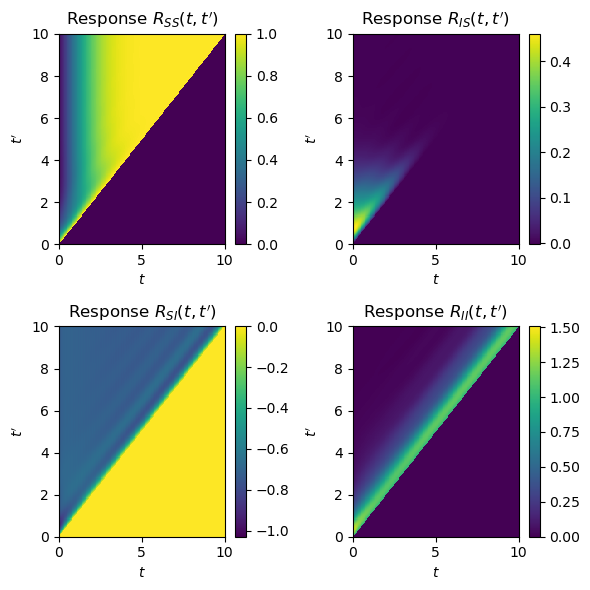

In [33]:
figure(figsize=(6,6))
subplot(221)
pcolor(SOL[1].t,SOL[1].t,VAR[1].R[1,1,:,:])
xlabel(L"$t$")
ylabel(L"$t'$")
title(L"Response $R_{SS}(t,t')$")
colorbar()

subplot(222)
pcolor(SOL[1].t,SOL[1].t,VAR[1].R[2,1,:,:])
title(L"Response $R_{IS}(t,t')$")
xlabel(L"$t$")
ylabel(L"$t'$")
colorbar()

subplot(223)
pcolor(SOL[1].t,SOL[1].t,VAR[1].R[1,2,:,:])
title(L"Response $R_{SI}(t,t')$")
xlabel(L"$t$")
ylabel(L"$t'$")
colorbar()

subplot(224)
pcolor(SOL[1].t,SOL[1].t,VAR[1].R[2,2,:,:])
title(L"Response $R_{II}(t,t')$")
xlabel(L"$t$")
ylabel(L"$t'$")
colorbar()
tight_layout()

gcf()

In [34]:
savefig("../plots/SIR/SIR_response_functions.png")
close("all")

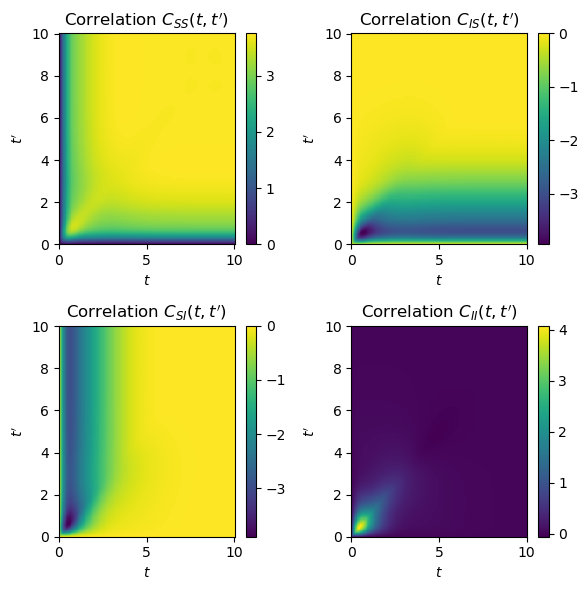

In [35]:
figure(figsize=(6,6))
subplot(221)
pcolor(SOL[1].t,SOL[1].t,VAR[1].C[1,1,:,:])
title(L"Correlation $C_{SS}(t,t')$")
xlabel(L"$t$")
ylabel(L"$t'$")
colorbar()
gcf()

subplot(222)
pcolor(SOL[1].t,SOL[1].t,VAR[1].C[2,1,:,:])
title(L"Correlation $C_{IS}(t,t')$")
xlabel(L"$t$")
ylabel(L"$t'$")
colorbar()
gcf()

subplot(223)
pcolor(SOL[1].t,SOL[1].t,VAR[1].C[1,2,:,:])
title(L"Correlation $C_{SI}(t,t')$")
xlabel(L"$t$")
ylabel(L"$t'$")
colorbar()
gcf()

subplot(224)
pcolor(SOL[1].t,SOL[1].t,VAR[1].C[2,2,:,:])
title(L"Correlation $C_{II}(t,t')$")
xlabel(L"$t$")
ylabel(L"$t'$")
colorbar()

tight_layout()
gcf()

In [36]:
savefig("../plots/SIR/SIR_correlation_functions.png")
close("all")

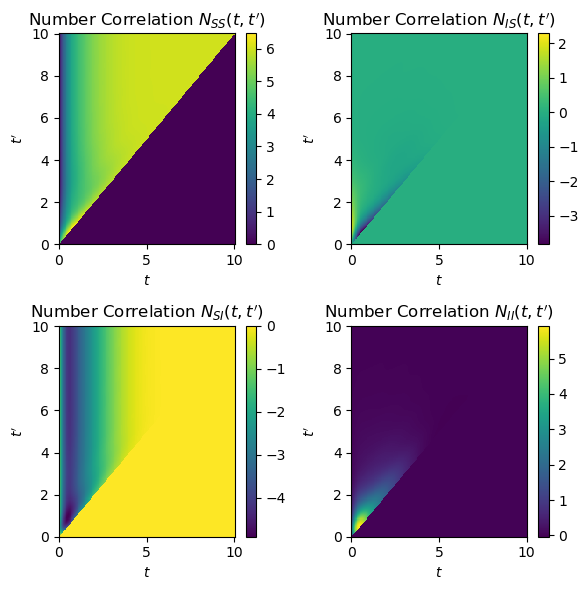

In [37]:
figure(figsize=(6,6))
subplot(221)
pcolor(SOL[1].t,SOL[1].t,VAR[1].N[1,1,:,:])
title(L"Number Correlation $N_{SS}(t,t')$")
xlabel(L"$t$")
ylabel(L"$t'$")
colorbar()
gcf()

subplot(222)
pcolor(SOL[1].t,SOL[1].t,VAR[1].N[2,1,:,:])
title(L"Number Correlation $N_{IS}(t,t')$")
xlabel(L"$t$")
ylabel(L"$t'$")
colorbar()
gcf()

subplot(223)
pcolor(SOL[1].t,SOL[1].t,VAR[1].N[1,2,:,:])
title(L"Number Correlation $N_{SI}(t,t')$")
xlabel(L"$t$")
ylabel(L"$t'$")
colorbar()
gcf()

subplot(224)
pcolor(SOL[1].t,SOL[1].t,VAR[1].N[2,2,:,:])
title(L"Number Correlation $N_{II}(t,t')$")
xlabel(L"$t$")
ylabel(L"$t'$")
colorbar()

tight_layout()
gcf()

In [38]:
savefig("../plots/SIR/SIR_number_correlations.png")
close("all")

### Commparing with other methods:

In [7]:
## Running MAK:

SOL_mak = []
VAR_mak = []

for i in alpha_range
    
    structure = Achedmy.ReactionStructure(SIR_system)
    variables = Achedmy.ReactionVariables(structure,"single")
    sol = Achedmy.solve_dynamics!(structure,variables,selfEnergy = "MAK", tmax = tmax, tstart = tstart,
    atol = atol, rtol = rtol);

    push!(SOL_mak,sol)
    push!(VAR_mak,variables)

end


t: 0.0
t: 1.0e-6
t: 5.999999999999999e-6
t: 2.6748224517521933e-5
t: 5.95770629872239e-5
t: 0.00019134570211083498
t: 0.000645383796580642
t: 0.0018338410882976928
t: 0.003853845512477882
t: 0.00858313267739205
t: 0.01595659026793927
t: 0.029222219153560054
t: 0.047749093571556774
t: 0.07619385902110298
t: 0.11314199290814125
t: 0.16403610678428032
t: 0.22697421452057542
t: 0.30730955015764805
t: 0.40289214940584883
t: 0.5169288369303394
t: 0.6466282234807481
t: 0.7897587479022201
t: 0.936939150221659
t: 1.0887655408187615
t: 1.2427172551177776
t: 1.3972688330161442
t: 1.5536512308336223
t: 1.7136336230466116
t: 1.8796435749624067
t: 2.0545857412259374
t: 2.2411867061843433
t: 2.4420043386530565
t: 2.65942368587354
t: 2.8954570105044617
t: 3.1515849925504336
t: 3.428604126016154
t: 3.726538587217739
t: 4.04470570156903
t: 4.38189188243579
t: 4.736564598013453
t: 5.107065752378631
t: 5.491753575284601
t: 5.889089728345602
t: 6.297683795294559
t: 6.716308652372665
t: 7.14389851211303
t: 

In [53]:
# SOL_mak = open("../data/SIR/sol_mak.jls", "r") do f
#     deserialize(f)
# end

# VAR_mak = open("../data/SIR/var_mak.jls", "r") do f
#     deserialize(f)
# end

In [54]:
# open("../data/SIR/sol_mak.jls", "w") do f
#     serialize(f, SOL_mak)
# end

# open("../data/SIR/var_mak.jls", "w") do f
#     serialize(f, VAR_mak)
# end

## Compare with other dynamical methods:

Note that now we use other libraries and code written in python for the implementation of other dynamical methods. They are NOT originally intended to be a part of the package.

In [ ]:
import Pkg
Pkg.add("PyCall")
Pkg.add("Conda")

using PyCall
using Pkg
using Conda

py"""
import sys
sys.path.append("../extras/other_dynamics")
"""

In [ ]:
## if necessary, set the Python Env to the python executable of your choice
## (e.g. from a conda env which has the required packages installed)
# ENV["PYTHON"] = "/Users/localadmin-moshir.harsh01/micromamba/envs/torch/bin/python3"
# Pkg.build("PyCall")

In [9]:
@pyimport cheMASTER
@pyimport emre

@pyimport numpy as np
@pyimport importlib

In [10]:
# Setting up the reactions and the parameters:

num_species     = 2 #Number of species in the reaction system
num_interaction = 1 # Number of interating reactions in the Hamiltonian
num_reactions   = 2*num_species + num_interaction # This counts the total number of possible reactions in the system.
                                        # We have 2N creation and destruction reactions and the rest interaction reactions

# We take the order to be G,G*,P

# Rate constants for the reaction system: [k1 is Creation and k2 is Destruction]
k1 = np.array([0.,0.]) #len must be equal to num_species
k2 = np.array([0.,1.]) #len must be equal to num_species

k3 = np.array([0.75]) 
s_i,r_i = np.zeros([num_interaction,num_species]),np.zeros([num_interaction,num_species])
rxn_par = [k1,k2,k3]

s_i[1,:] = [0,2] 
r_i[1,:] = [1,1]

#The initial concentration of the species. 
#Note: for Gillespie we start each trajectory from a Poisonian random variable with mean as the initial conc.below:
initial_values = np.array([5.,1.])

dt = 0.05
tf = 10.

10.0

In [11]:
#Plot settings!

cmap = plt.get_cmap("tab10")

original_rcParams = copy(plt.rcParams)
rcParams = PyDict(matplotlib["rcParams"])

plot_params = Dict("font.size" => 70, "font.family" => "sans-serif", "text.usetex" => true, "font.weight" => 900, "axes.linewidth" => 2, "xtick.major.width" => 3, "xtick.major.size" => 5, "xtick.minor.width" => 2, "xtick.minor.size" => 3, "ytick.major.width" => 3, "ytick.major.size" => 5, "ytick.minor.width" => 2, "ytick.minor.size" => 3, "axes.labelsize" => 18, "xtick.labelsize" => 18, "ytick.labelsize" => 18)
plot_params2 = (Dict(
    "text.usetex" => false,
    "xtick.labelsize" => 20,
    "ytick.labelsize" => 20,
    "xtick.major.width" => 3,
    "ytick.major.width" => 3,
    "xtick.major.size" => 10,
    "ytick.major.size" => 10,
    "xtick.direction" => "in",
    "ytick.direction" => "in",
    "font.size" => 30,
    "figure.autolayout" => true,
    "figure.figsize" => (10, 5),
    "axes.titlesize" => 20,
    "axes.labelsize" => 20,
    "lines.linewidth" => 3,
    "lines.markersize" => 3,
    "legend.fontsize" => 13,
    "mathtext.fontset" => "stix",
    "axes.linewidth" => 3
))

merge!(rcParams,plot_params)
merge!(rcParams,plot_params2)

PyDict{PyAny, PyAny, true} with 322 entries:
  "webagg.port"            => 8988
  "webagg.address"         => "127.0.0.1"
  "webagg.port_retries"    => 50
  "webagg.open_in_browser" => true
  "backend_fallback"       => false
  "interactive"            => false
  "figure.hooks"           => Any[]
  "toolbar"                => "toolbar2"
  "timezone"               => "UTC"
  "lines.linewidth"        => 3.0
  "lines.linestyle"        => "-"
  "lines.color"            => "C0"
  "lines.marker"           => "None"
  "lines.markerfacecolor"  => "auto"
  "lines.markeredgecolor"  => "auto"
  "lines.markeredgewidth"  => 1.0
  "lines.markersize"       => 3.0
  "lines.dash_joinstyle"   => "round"
  "lines.dash_capstyle"    => "butt"
  ⋮                        => ⋮

## Run Master equation and EMRE solutions:

In [12]:
Master = []

for i in range(1,length(alpha_range))
    
    push!(Master,cheMASTER.chemical_system_class(num_interaction,num_species,rxn_par,r_i,s_i))
    
    cheMASTER.initialize_dynamics(Master[i],initial_values,0,tf,dt)

    cheMASTER.runDynamics(Master[i],max_num=[20,15],method = "RK4",crossCorrelator_tau="connected",variance=true,crossCorrelator=[0,1], return_probability=true)
    print(i,"\n")
    
end

1


100%|##########| 200/200 [00:00<00:00, 3500.91it/s]


In [ ]:
# open("../data/SIR/master.jls", "w") do f
#     serialize(f, Master)
# end

In [ ]:
# MASTER = open("../data/SIR/master.jls", "r") do f
#     deserialize(f)
# end

In [12]:
EMRE   = []

for i in range(1,length(alpha_range))
    
    push!(EMRE,emre.chemical_system_class(num_interaction,num_species,rxn_par,r_i,s_i))
    emre.initialize_dynamics(EMRE[i],initial_values,0,tf,dt,alpha=1.,volume=1.,measureResponse=true,crossCorrelator_tau=true)
    emre.runDynamics(EMRE[i])

    println(i)
end

1


199it [00:00, 1702.82it/s]                         


In [ ]:
# open("../data/SIR/emre.jls", "w") do f
#     serialize(f, EMRE)
# end

### Plots for the paper comparing different methods:

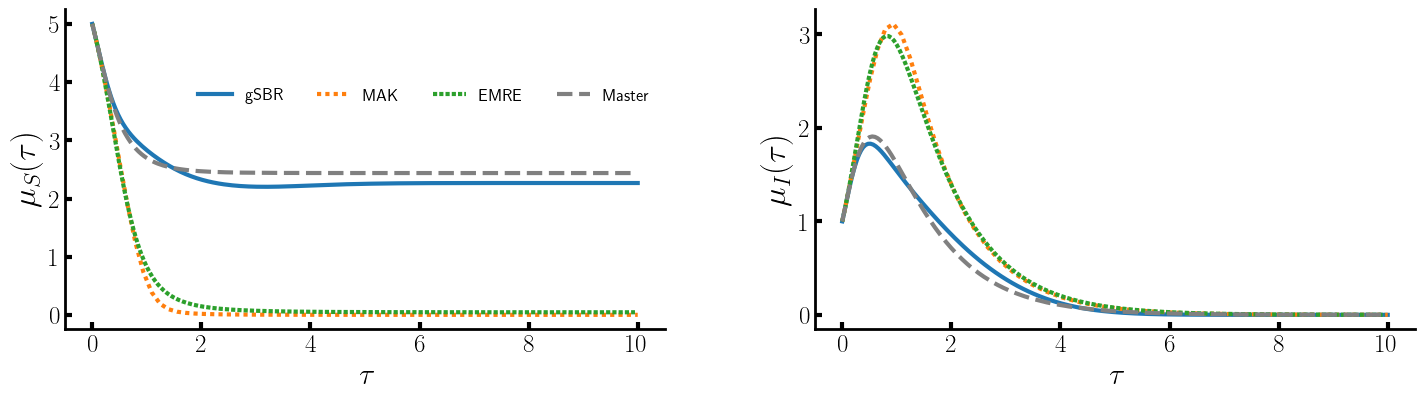

In [41]:
plot_params3 = (Dict(
    "font.size" => 20,
    "font.family" => "sans-serif",
    "text.usetex" => true,
    "font.weight" => 900,
    "axes.linewidth" => 2,
    "xtick.major.width" => 3,
    "xtick.major.size" => 5,
    "xtick.minor.width" => 2,
    "xtick.minor.size" => 3,
    "ytick.major.width" => 3,
    "ytick.major.size" => 5,
    "ytick.minor.width" => 2,
    "ytick.minor.size" => 3,
    "axes.labelsize" => 18,
    "xtick.labelsize" => 18,
    "ytick.labelsize" => 18,
    "font.size" => 20,
))

rcParams = PyDict(matplotlib["rcParams"])
merge!(rcParams, plot_params3)

fig1 = figure(figsize=(15,8))

ax_1 = fig1.add_axes([0.,0.525, 0.4, 0.4])
ax_2 = fig1.add_axes([0.5,0.525, 0.4, 0.4])

axes = [ax_1, ax_2]
skip = 1
cOL = plt.rcParams["axes.prop_cycle"].by_key()["color"]

for j in 1:num_species
    axes[j].plot(SOL[1].t[1:skip:end], VAR[1].μ[j, 1:skip:end], linestyle="-", c=cOL[1], alpha=1., linewidth=3)
    axes[j].plot(SOL_mak[1].t[1:skip:end], VAR_mak[1].μ[j, 1:skip:end], linestyle=(0, (1, 1)), c=cOL[2], alpha=1., linewidth=3)
    axes[j].plot(EMRE[1].timeGrid[1:skip:end], EMRE[1].y[j, 1:skip:end], linestyle=(0, (1, 0.5)), c=cOL[3], alpha=1., linewidth=3)
    axes[j].plot(Master[1].timeGrid[1:skip:end], Master[1].y[j, 1:skip:end], "--", c="gray", alpha=1., linewidth=3)

    axes[j].spines["right"].set_visible(false)
    axes[j].spines["top"].set_visible(false)
    axes[j].set_xlabel(L"$\tau$", fontsize=22)
end

axes[1].set_ylabel(L"$\mu_S(\tau)$", fontsize=24)
axes[2].set_ylabel(L"$\mu_I(\tau)$", fontsize=24)

ax_1.legend(["gSBR", "MAK", "EMRE", "Master"], bbox_to_anchor=(1., 0.8), loc=1, frameon=false, fontsize=12, ncol=4)

gcf()


In [42]:
savefig("../plots/SIR/SIR_means_comparison.png", bbox_inches="tight")
close("all")

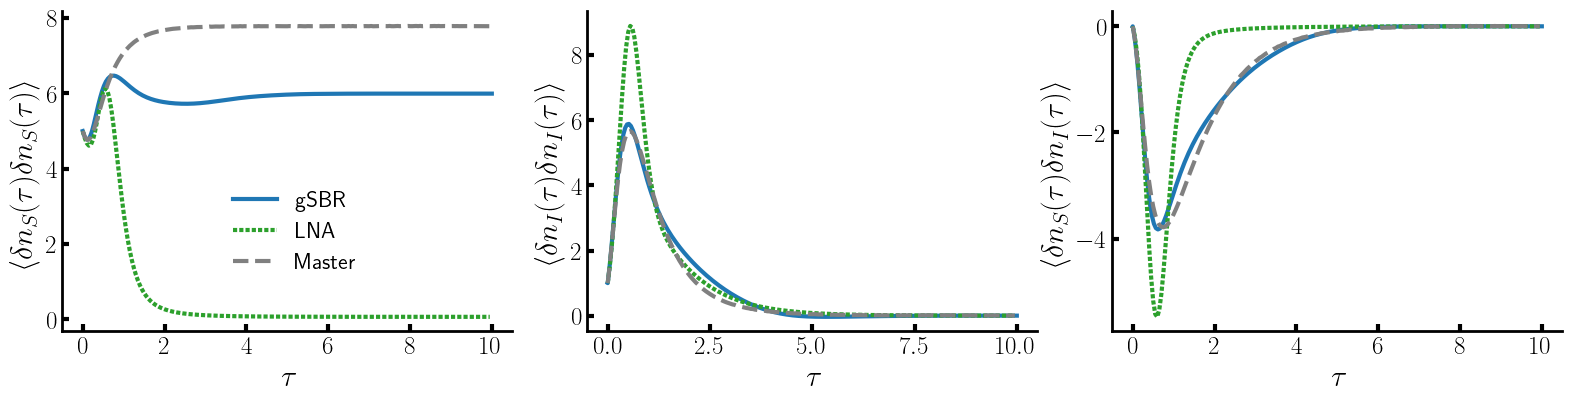

In [39]:
plot_params_var = Dict(
    "font.size" => 70,
    "font.family" => "sans-serif",
    "text.usetex" => true,
    "font.weight" => 900,
    "axes.linewidth" => 2,
    "xtick.major.width" => 3,
    "xtick.major.size" => 5,
    "xtick.minor.width" => 2,
    "xtick.minor.size" => 3,
    "ytick.major.width" => 3,
    "ytick.major.size" => 5,
    "ytick.minor.width" => 2,
    "ytick.minor.size" => 3,
    "axes.labelsize" => 18,
    "xtick.labelsize" => 18,
    "ytick.labelsize" => 18
)

rcParams = PyDict(matplotlib["rcParams"])
merge!(rcParams, plot_params_var)

fig1 = figure(figsize=(15,8))

ax_1 = fig1.add_axes([0.,0.525, 0.3, 0.4])
ax_2 = fig1.add_axes([0.35,0.525, 0.3, 0.4])
ax_5 = fig1.add_axes([0.7,0.525, 0.3, 0.4])

axes = [ax_1, ax_2, ax_5]
skip = 1
cOL = plt.rcParams["axes.prop_cycle"].by_key()["color"]

# Plot SS variance
axes[1].plot(SOL[1].t[1:skip:end], diag(VAR[1].N[1,1,:,:][1:skip:end, 1:skip:end]), linestyle="-", c=cOL[1], alpha=1., linewidth=3)
axes[1].plot(EMRE[1].timeGrid[1:skip:end], EMRE[1].lna_var[1,1,1:skip:end], linestyle=(0, (1, 0.5)), c=cOL[3], alpha=1., linewidth=3)
axes[1].plot(Master[1].timeGrid[1:skip:end], Master[1].variance[1,1:skip:end], "--", c="gray", alpha=1., linewidth=3)

# Plot II variance  
axes[2].plot(SOL[1].t[1:skip:end], diag(VAR[1].N[2,2,:,:][1:skip:end, 1:skip:end]), linestyle="-", c=cOL[1], alpha=1., linewidth=3)
axes[2].plot(EMRE[1].timeGrid[1:skip:end], EMRE[1].lna_var[2,2,1:skip:end], linestyle=(0, (1, 0.5)), c=cOL[3], alpha=1., linewidth=3)
axes[2].plot(Master[1].timeGrid[1:skip:end], Master[1].variance[2,1:skip:end], "--", c="gray", alpha=1., linewidth=3)

# Plot SI covariance
axes[3].plot(SOL[1].t[1:skip:end], diag(VAR[1].N[1,2,:,:][1:skip:end, 1:skip:end]), linestyle="-", c=cOL[1], alpha=1., linewidth=3)
axes[3].plot(EMRE[1].timeGrid[1:skip:end], EMRE[1].lna_var[1,2,1:skip:end], linestyle=(0, (1, 0.5)), c=cOL[3], alpha=1., linewidth=3)
axes[3].plot(Master[1].timeGrid[1:skip:end], Master[1].crossC[1:skip:end], "--", c="gray", alpha=1., linewidth=3)

for j in 1:length(axes)
    axes[j].spines["right"].set_visible(false)
    axes[j].spines["top"].set_visible(false)
    axes[j].set_xlabel(L"$\tau$", fontsize=22)
end

axes[1].set_ylabel(L"$\langle \delta n_S(\tau) \delta n_S(\tau) \rangle$", fontsize=22)
axes[2].set_ylabel(L"$\langle \delta n_I(\tau) \delta n_I(\tau) \rangle$", fontsize=22)
axes[3].set_ylabel(L"$\langle \delta n_S(\tau) \delta n_I(\tau) \rangle$", fontsize=22)

ax_1.legend(["gSBR", "LNA", "Master"], bbox_to_anchor=(0.7, 0.5), loc=1, frameon=false, fontsize=16, ncol=1)

gcf()

In [40]:
savefig("../plots/SIR/SIR_variances_comparison.png", bbox_inches="tight")
close("all")

<sys>:0: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.


### Get the probability distribution from the master equation and plot it:

In [13]:
sat = [1, 21, 101]  # Julia uses 1-based indexing
probability = []

for t in 1:length(sat)
    push!(probability, zeros(Master[1].master_maxNum...))
    for i in 1:Master[1].master_maxNum[1]
        for j in 1:Master[1].master_maxNum[2]
            x = findall(x -> x == i-1, Master[1].master_stateSpace[:, 1])  # Convert to 0-based for comparison
            y = findall(y -> y == j-1, Master[1].master_stateSpace[:, 2])  # Convert to 0-based for comparison
            intersection = intersect(x, y)
            if !isempty(intersection)
                probability[t][i, j] = max(Master[1].probability[intersection[1], sat[t]], 0.0) / sum(Master[1].probability[:, sat[t]])
            end
        end
    end
end

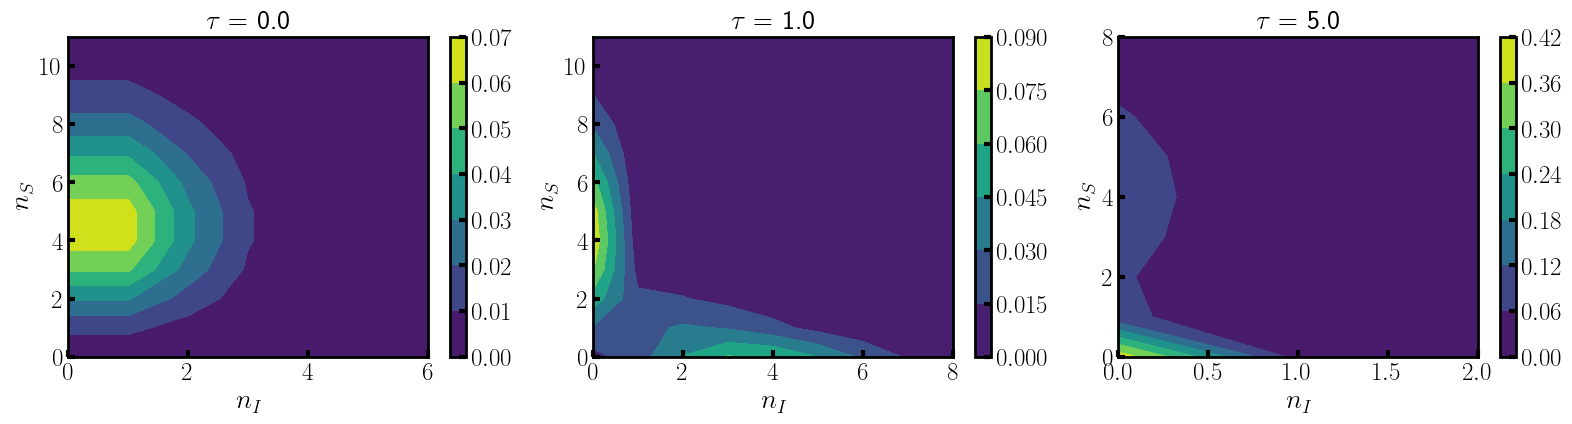

<sys>:0: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.


In [15]:
rcParams = PyDict(matplotlib["rcParams"])
plot_params_prob = Dict(
    "font.size" => 70,
    "font.family" => "sans-serif",
    "text.usetex" => true,
    "font.weight" => 900,
    "axes.linewidth" => 2,
    "xtick.major.width" => 3,
    "xtick.major.size" => 5,
    "xtick.minor.width" => 2,
    "xtick.minor.size" => 3,
    "ytick.major.width" => 3,
    "ytick.major.size" => 5,
    "ytick.minor.width" => 2,
    "ytick.minor.size" => 3,
    "axes.labelsize" => 18,
    "xtick.labelsize" => 18,
    "ytick.labelsize" => 18
)
merge!(rcParams, plot_params_prob)

fig1 = figure(figsize=(15,8))

ax_1 = fig1.add_axes([0.,0.525, 0.3, 0.4])
ax_2 = fig1.add_axes([0.35,0.525, 0.3, 0.4])
ax_5 = fig1.add_axes([0.7,0.525, 0.3, 0.4])

axes = [ax_1, ax_2, ax_5]
sat2 = [1, 2, 3]  # Julia 1-based indexing
skip = 1

cOL = plt.rcParams["axes.prop_cycle"].by_key()["color"]

lim = 10

im1 = axes[1].contourf(probability[sat2[1]][1:12, 1:7])
fig1.colorbar(im1)
im2 = axes[2].contourf(probability[sat2[2]][1:12, 1:9])
fig1.colorbar(im2)
im3 = axes[3].contourf(probability[sat2[3]][1:9, 1:3])
fig1.colorbar(im3)

for i in 1:length(sat)
    axes[i].set_title(L"$\tau = $ " * string((sat[i]-1)*dt), fontsize=20)
    axes[i].set_xlabel(L"$n_I$", fontsize=20)
    axes[i].set_ylabel(L"$n_S$", fontsize=20)
end

gcf()

In [16]:
savefig("../plots/SIR/SIR_probability.png", bbox_inches="tight")
close("all")

<sys>:0: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
